<a href="https://colab.research.google.com/github/sanskriti49/Sentimental-Analysis/blob/main/Sentiment_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
!pip install nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Importing dataset

In [24]:
url = "https://raw.githubusercontent.com/sanskriti49/Sentimental-Analysis/refs/heads/main/Restaurant%20reviews.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")
df = df.drop(columns=["Restaurant","Reviewer","Metadata","Time","Pictures"])



```
# This is formatted as code
```

###Data cleaning

In [25]:
y = df["Rating"]
X = df.drop(columns=["Rating"])
y = y.replace({'Like':3})
y = y.fillna(y.median())
y = pd.to_numeric(y)

y = y.astype(object)
for i in range(0,len(y)):
    y.iloc[i] = round(y.iloc[i],0)

for i in range(0,len(y)):
    if (y[i]>=3):
        y[i] = "Positive"
    else:
        y[i] = "Negative"

In [26]:
#Stemming
ps = PorterStemmer()
original_to_stem={}
corpus = []

for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ', str(X['Review'][i]))
    review = review.lower()
    review = review.split()

    stemmed_review=[]
    for word in review:
      if word not in stopwords.words('english'):
        stemmed_word=ps.stem(word)
        stemmed_review.append(stemmed_word)

        if stemmed_word not in original_to_stem:
          original_to_stem[stemmed_word]=word

    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(stemmed_review)
    corpus.append(review)

###Data transformation

In [27]:
# Creating Matrix of CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=9000)
X = cv.fit_transform(corpus).toarray()


###Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
# Applying MultinomialNB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)


# Making Predictions and creating confusion matrix

[[ 457  127]
 [ 102 1814]]


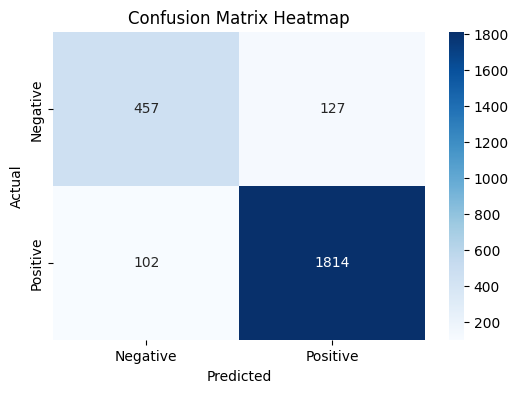

In [30]:
y_pred = classifier.predict(X_test)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Getting the Accuracy

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9084


# Dumping Models

                                              Review Sentiment
0  The ambience was good, food was quite good . h...  Positive
1  Ambience is too good for a pleasant evening. S...  Positive
2  A must try.. great food great ambience. Thnx f...  Positive
3  Soumen das and Arun was a great guy. Only beca...  Positive
4  Food is good.we ordered Kodi drumsticks and ba...  Positive


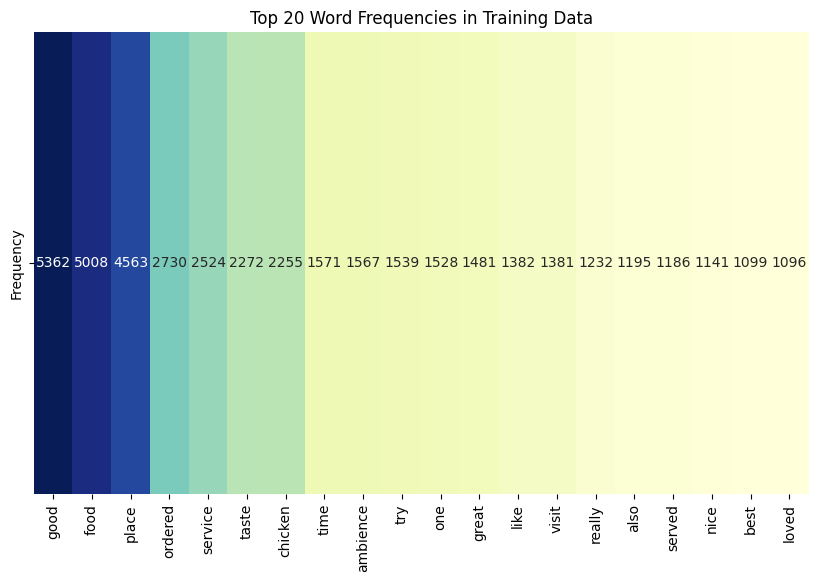

In [32]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(cv,open('cv-model.pkl','wb'))

# Create a DataFrame with cleaned reviews and their corresponding sentiments
final_df = pd.DataFrame({'Review': df['Review'], 'Sentiment': y})

# Display the first few rows of the new DataFrame
print(final_df.head())

# Word Frequency Heatmap
feature_names = cv.get_feature_names_out()
word_counts = X_train.sum(axis=0)  #sum occurrences of each word in the training set
word_freq_df = pd.DataFrame({'Stemmed Word': feature_names, 'Frequency': word_counts})

word_freq_df['Original Word']=word_freq_df['Stemmed Word'].map(original_to_stem)

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Top 20 words

# Create Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(word_freq_df[['Frequency']].T, annot=True, fmt='d', cmap='YlGnBu', cbar=False, xticklabels=word_freq_df['Original Word'])
plt.title('Top 20 Word Frequencies in Training Data')
plt.show()
